**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [3]:
scalarx=StandardScaler() #storing the scalar function for use

**Loading Data**

In [4]:
df = pd.read_csv('/kaggle/input/titanic-dataset/train.csv') # simple loading 
#df.info()  #891*12

#df.isnull().sum()


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Filling Null Values**

In [29]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Age'] = df['Age'].fillna(df['Age'].median())
#numeric Null Values

In [30]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])
#categorical Null Values

In [59]:
df_temp=df

#df_temp[['Sex', 'Cabin', 'Embarked','Ticket']] = df_temp[['Sex', 'Cabin', 'Embarked','Ticket']].apply(lambda x: x.astype('category').cat.codes)
df_temp
#Separating X and Y as in the given dataset Y was also given in the training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_Sex,Pclass_Age,FamilySize,IsAlone,Title,TicketGroupSize,FareLog
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,47,2,5,132,2,0,2,1,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0,0,26,2,0,3,1,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,47,2,4,138,1,1,1,1,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2,0,23,2,0,3,2,3.990834
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,47,2,5,151,1,1,2,1,2.202765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,47,2,3,73,1,1,-1,1,2.639057
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,30,2,0,7,1,1,1,1,3.433987
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,675,23.4500,47,2,4,140,4,0,1,2,3.196630
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,60,0,1,14,1,1,2,1,3.433987


In [38]:

df_temp=pd.DataFrame(df_temp.drop(['Name','Survived'],axis=1).values, columns=df_temp.drop(['Name','Survived'],axis=1).columns)


In [37]:
df_temp[['Sex', 'Cabin', 'Embarked','Ticket','Title']] = df_temp[['Sex', 'Cabin', 'Embarked','Ticket','Title']].apply(lambda x: x.astype('category').cat.codes)


In [14]:
df_temp['Title'].astype('category').cat.codes

0      3
1      4
2      2
3      4
4      3
      ..
886    0
887    2
888    2
889    3
890    3
Length: 891, dtype: int8

**Correlation of Matrix**

In [39]:
correlation = df_temp.corr()  
correlation
# Correlation matrix of all features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_Sex,Pclass_Age,FamilySize,IsAlone,Title,TicketGroupSize,FareLog
PassengerId,1.000000,-0.035144,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128,-0.021260,-0.028710,-0.040143,0.057462,0.018125,0.003355,-0.007425
Pclass,-0.035144,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098,0.964682,0.963473,0.065997,0.135207,-0.008599,-0.002633,-0.661022
Sex,0.042939,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262,0.388358,0.142464,-0.200988,0.303646,-0.036384,-0.154748,-0.263276
Age,0.034212,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.060534,-0.018754,-0.294412,-0.154194,-0.245619,0.171647,0.326258,-0.218669,0.110964
SibSp,-0.057527,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230,0.046773,0.083774,0.890712,-0.584471,-0.225758,0.661622,0.318528
Parch,-0.001652,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798,-0.048091,0.037409,0.783111,-0.583398,-0.107378,0.593076,0.332186
Ticket,-0.056554,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729,0.313138,0.323304,0.064302,0.028314,-0.004508,0.017907,-0.110965
Fare,0.012658,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719,-0.559285,-0.539003,0.217138,-0.271832,-0.031675,0.345541,0.787543
Cabin,-0.018086,-0.248495,-0.102643,0.060534,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804,-0.258285,-0.233945,0.007546,-0.120207,0.051142,0.007317,0.191159
Embarked,0.013128,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.001729,-0.224719,0.023804,1.000000,0.179461,0.170619,0.066516,0.063532,0.040334,0.049428,-0.202444


In [40]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [41]:
corr_features = correlation(df_temp, 0.6)
corr_features

{'FamilySize',
 'FareLog',
 'IsAlone',
 'Pclass_Age',
 'Pclass_Sex',
 'TicketGroupSize'}

In [42]:
corr_features = list(corr_features)
df_temp=df_temp[corr_features]
df_temp.head()

,Pclass_Sex,FamilySize,TicketGroupSize,IsAlone,FareLog,Pclass_Age
0,5.0,2.0,1.0,0.0,2.110213,132.0
1,0.0,2.0,1.0,0.0,4.280593,26.0
2,4.0,1.0,1.0,1.0,2.188856,138.0
3,0.0,2.0,2.0,0.0,3.990834,23.0
4,5.0,1.0,1.0,1.0,2.202765,151.0


In [43]:
df_Y=pd.DataFrame(df["Survived"].values,columns=["Survived"])

**Filling Null values by mean**

In [49]:
#Not using just in case if it improve accuracy
mean_age = df_temp['Age'].mean()
df_temp['Age'] = df_temp['Age'].fillna(mean_age)

/tmp/ipykernel_30/1751973087.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_temp['Age'] = df_temp['Age'].fillna(mean_age)


In [20]:
df_temp.isnull().sum()

IsAlone            0
FamilySize         0
TicketGroupSize    0
FareLog            0
Pclass_Sex         0
Pclass_Age         0
dtype: int64

In [45]:
df_temp.dtypes

Pclass_Sex         float64
FamilySize         float64
TicketGroupSize    float64
IsAlone            float64
FareLog            float64
Pclass_Age         float64
dtype: object

In [44]:
# Assuming df_temp is your DataFrame
columns_to_convert = ['FamilySize', 'FareLog', 'IsAlone', 'Pclass_Age', 'Pclass_Sex', 'TicketGroupSize']

for col in columns_to_convert:
    df_temp[col] = pd.to_numeric(df_temp[col], errors='coerce')

**Changing DataTypes**

In [29]:
df_temp['Pclass'] = pd.to_numeric(df_temp['Pclass'], errors='coerce')
df_temp['PassengerId'] = pd.to_numeric(df_temp['PassengerId'], errors='coerce')
df_temp['Age'] = pd.to_numeric(df_temp['Age'], errors='coerce')
df_temp['SibSp'] = pd.to_numeric(df_temp['SibSp'], errors='coerce')
df_temp['Parch'] = pd.to_numeric(df_temp['Parch'], errors='coerce')
df_temp['Ticket'] = pd.to_numeric(df_temp['Ticket'], errors='coerce')
df_temp['Cabin'] = pd.to_numeric(df_temp['Cabin'], errors='coerce')

df_temp['Fare'] = pd.to_numeric(df_temp['Fare'], errors='coerce')



KeyError: 'Pclass'

In [132]:
df_temp.shape


(891, 17)

**OutLiers Detetcion**

In [46]:
# Z-score calculation for numerical columns
z_scores = np.abs(stats.zscore(df_temp.select_dtypes(include=['int', 'float'])))
outliers = (z_scores > 3).any(axis=1)  
df_outliers = df_temp[outliers]


In [47]:
df_temp.shape

(891, 6)

**Saving Data in csv**

In [151]:
df_temp.to_csv('refined_data.csv', index=False)

> **TESTINGG**

In [48]:
df_combined = pd.concat([df_temp, df_Y], axis=1)
correlation_with_target = df_combined.corr()['Survived'].sort_values(ascending=False)

correlation_with_target

Survived           1.000000
FareLog            0.329862
TicketGroupSize    0.038247
FamilySize         0.016639
IsAlone           -0.203367
Pclass_Age        -0.352261
Pclass_Sex        -0.459052
Name: Survived, dtype: float64

In [56]:
threshold = 0.35
high_correlation_features = correlation_with_target[abs(correlation_with_target) > threshold]
high_correlation_features

Survived      1.000000
Pclass_Age   -0.352261
Pclass_Sex   -0.459052
Name: Survived, dtype: float64

In [57]:
# Assuming high_correlation_features is a pandas Series
high_correlation_features = high_correlation_features.index
high_correlation_features = high_correlation_features[1:]

In [58]:
df_temp=df_temp[high_correlation_features]
df_temp.head()

,Pclass_Age,Pclass_Sex
0,132.0,5.0
1,26.0,0.0
2,138.0,4.0
3,23.0,0.0
4,151.0,5.0


In [32]:
# 1. Create FamilySize
df_temp['FamilySize'] = df_temp['SibSp'] + df_temp['Parch'] + 1

# 2. Create IsAlone feature
df_temp['IsAlone'] = (df_temp['FamilySize'] == 1).astype(int)

# 3. Extract titles from the 'Name' column
df_temp['Title'] = df_temp['Name'].str.extract(r',\s*(Mr\.|Mrs\.|Miss\.|Ms\.|Dr\.)')
df_temp['Title'].astype('category').cat.codes
# 4. Calculate Ticket Group Size
df_temp['TicketGroupSize'] = df_temp.groupby('Ticket')['Ticket'].transform('count')

In [33]:
df_temp['FareLog'] = df_temp['Fare'].apply(lambda x: np.log(x + 1))  # Add 1 to avoid log(0)
print(df_temp[['Fare', 'FareLog']].head())

      Fare   FareLog
0   7.2500  2.110213
1  71.2833  4.280593
2   7.9250  2.188856
3  53.1000  3.990834
4   8.0500  2.202765


In [60]:
df_temp['Pclass_Sex'] = df_temp['Pclass'].astype(str) + '_' + df_temp['Sex']

# If needed, convert the new interaction feature into categorical codes for machine learning models


df_temp['Pclass_Age']=df_temp['Pclass'].astype(str)+'_'+df_temp['Age'].astype(str)


TypeError: can only concatenate str (not "int") to str

In [69]:
# Assume `train` is your training DataFrame
df_temp['Pclass_Sex'] = df_temp['Pclass'].astype(str) + "_" + df_temp['Sex'].astype(str)

# Generate the mapping
mapping1 = {value: idx for idx, value in enumerate(df_temp['Pclass_Sex'].unique())}

# Print the mapping to verify
print(mapping1)


{'3_1': 0, '1_0': 1, '3_0': 2, '1_1': 3, '2_0': 4, '2_1': 5}


In [65]:
# Assume `train` is your training DataFrame
df_temp['Pclass_Age'] = df_temp['Pclass'].astype(str) + "_" + df_temp['Age'].astype(str)

# Generate the mapping
mapping2 = {value: idx for idx, value in enumerate(df_temp['Pclass_Age'].unique())}

# Print the mapping to verify
print(mapping2)


{'3_22.0': 0, '1_38.0': 1, '3_26.0': 2, '1_35.0': 3, '3_35.0': 4, '3_28.0': 5, '1_54.0': 6, '3_2.0': 7, '3_27.0': 8, '2_14.0': 9, '3_4.0': 10, '1_58.0': 11, '3_20.0': 12, '3_39.0': 13, '3_14.0': 14, '2_55.0': 15, '2_28.0': 16, '3_31.0': 17, '2_35.0': 18, '2_34.0': 19, '3_15.0': 20, '1_28.0': 21, '3_8.0': 22, '3_38.0': 23, '1_19.0': 24, '1_40.0': 25, '2_66.0': 26, '1_42.0': 27, '3_21.0': 28, '3_18.0': 29, '3_40.0': 30, '2_27.0': 31, '2_3.0': 32, '3_19.0': 33, '3_7.0': 34, '1_49.0': 35, '2_29.0': 36, '1_65.0': 37, '2_21.0': 38, '3_28.5': 39, '2_5.0': 40, '3_11.0': 41, '1_45.0': 42, '3_17.0': 43, '2_32.0': 44, '3_16.0': 45, '3_32.0': 46, '3_25.0': 47, '2_0.83': 48, '3_30.0': 49, '3_29.0': 50, '2_17.0': 51, '3_33.0': 52, '1_23.0': 53, '3_24.0': 54, '1_46.0': 55, '3_59.0': 56, '1_71.0': 57, '1_21.0': 58, '3_37.0': 59, '1_47.0': 60, '3_14.5': 61, '3_70.5': 62, '1_24.0': 63, '2_32.5': 64, '3_12.0': 65, '3_45.0': 66, '3_47.0': 67, '2_25.0': 68, '2_23.0': 69, '1_37.0': 70, '2_18.0': 71, '2_19.0

In [66]:

# Convert mapping to a DataFrame and save as CSV
mapping_df = pd.DataFrame(list(mapping2.items()), columns=['Pclass_Age', 'Code'])
mapping_df.to_csv('/kaggle/working/Pclass_Age.csv', index=False)


In [67]:


# Convert mapping to a DataFrame and save as CSV
mapping_df = pd.DataFrame(list(mapping1.items()), columns=['Pclass_Age', 'Code'])
mapping_df.to_csv('/kaggle/working/Pclass_Sex.csv', index=False)


In [35]:
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_Sex,Pclass_Age,FamilySize,IsAlone,Title,TicketGroupSize,FareLog
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,5,132,2,0,Mr.,1,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,26,2,0,Mrs.,1,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,4,138,1,1,Miss.,1,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,23,2,0,Mrs.,2,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,5,151,1,1,Mr.,1,2.202765


**Splitting data**

In [54]:
X_train,X_test,y_train,y_test=train_test_split(df_temp,df_Y,train_size=0.8,random_state=42)

In [1]:
X_train

NameError: name 'X_train' is not defined

In [21]:
corr_features

{'Fare', 'Parch'}

**Removing Correlated Features**

In [20]:
'''Fare        0.257307
Pclass_Sex        -0.338481
Sex        -0.543351'''
X_train=X_train[['Fare','Pclass_Sex','Pclass_Age']]
X_train

,Fare,Pclass_Sex,Pclass_Age
857,26.5500,1,41
52,76.7292,0,39
386,46.9000,5,116
124,77.2875,1,44
578,14.4583,4,140
...,...,...,...
835,83.1583,0,27
192,7.8542,4,127
629,7.7333,5,140
559,17.4000,4,152


In [21]:
X_test=X_test[['Fare','Pclass_Sex','Pclass_Age']]
y=y_test.values
y= y[:,0]
X_test

,Fare,Pclass_Sex,Pclass_Age
495,14.4583,5,140
648,7.5500,5,140
278,29.1250,5,177
31,146.5208,0,16
255,15.2458,4,142
...,...,...,...
263,0.0000,1,29
718,15.5000,5,140
620,14.4542,5,139
786,7.4958,4,126


In [40]:
#standardization
scalarx=StandardScaler()
X_scaled = scalarx.fit_transform(X_train)
X_scaled[1]

X_scaled2 = scalarx.fit_transform(X_test)

In [55]:
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
model = XGBClassifier()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [33]:
# Save the model
model.save_model('my_xgboost_model.model')

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:16:21] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [32]:
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score
best_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Set Accuracy: {test_accuracy}')

NameError: name 'best_params' is not defined

In [118]:


# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the hyperparameters and the ranges to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],   # Step size shrinkage
    'n_estimators': [100, 200, 300],     # Number of trees (boosting rounds)
    'max_depth': [3, 4, 5],              # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],       # Minimum sum of instance weight
    'subsample': [0.6, 0.8, 1.0],        # Fraction of observations to randomly sample for each tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features used for each tree
}

# Setup the GridSearchCV to perform cross-validation and search for the best parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and score
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score}')


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8143979351363484


In [160]:
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

# Assume df_temp contains your feature-engineered dataset
# Assume df_Y contains your target variable 'Survived'

# Initialize the XGBoost model
model = xgb.XGBClassifier()

# Perform cross-validation with 5 folds
# (you can change the number of folds as needed)
cv_scores = cross_val_score(model, df_temp, df_Y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Accuracy: {np.mean(cv_scores)}')
print(f'Standard Deviation of CV Accuracy: {np.std(cv_scores)}')


Cross-Validation Scores: [0.63687151 0.80898876 0.86516854 0.80898876 0.84831461]
Mean CV Accuracy: 0.7936664365074384
Standard Deviation of CV Accuracy: 0.08142870519202602


In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    classification_report, 
    confusion_matrix
)


from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define base models with additional classifiers
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('svm', SVC(probability=True)),  # Added SVM
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # Added XGBoost
]

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)


# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = stacking_clf.predict(X_test)
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy:.2f}')


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Stacking Classifier Accuracy: 0.81
Precision: 0.80
Recall: 0.72
F1 Score: 0.76
ROC AUC: 0.91
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix:
[[92 13]
 [21 53]]


In [155]:
data=pd.read_csv('/kaggle/input/titanic-dataset/train.csv')
# Check the distribution of the target variable 'Survived'
class_distribution = df['Survived'].value_counts()
print(class_distribution)


Survived
0    549
1    342
Name: count, dtype: int64


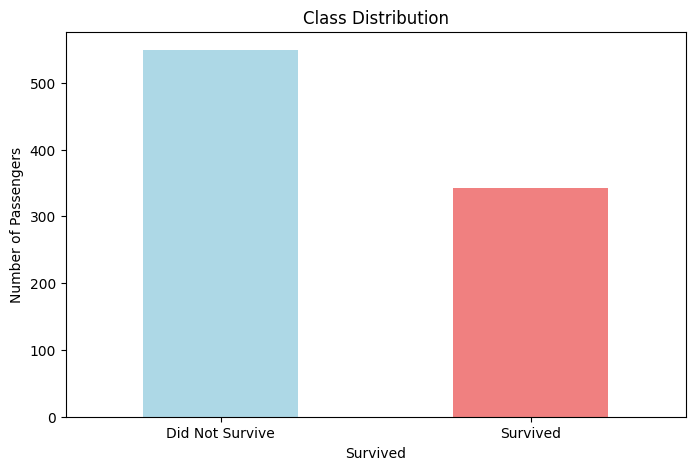

In [184]:
import matplotlib.pyplot as plt

# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Class Distribution')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()


In [156]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data['Survived'] == 0]
df_minority = data[data['Survived'] == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                     replace=False,     # sample without replacement
                                     n_samples=len(df_minority),    # to match minority class
                                     random_state=42)   # reproducible results

# Combine minority class with downsampled majority class
data_balanced = pd.concat([df_majority_downsampled, df_minority])

# Check new class distribution
print(data_balanced['Survived'].value_counts())


Survived
0    342
1    342
Name: count, dtype: int64


In [157]:
df_temp=data_balanced

In [185]:
importances = stacking_clf.named_estimators_['rf'].feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]:.4f}")


NameError: name 'X' is not defined